In [2]:
##DARKSKY API CODE SAMPLE Done by Drew(with the help of Kushal and Drake)
import pandas as pd
import json
import requests ## importing all modules

mets = pd.read_csv('SyracuseMets.csv') ## reading attendance csv for Syracuse Mets
mets.sample(5)

input_date = input("Enter a date and time in the following format - YYYY-MM-DDThh:mm:ss : ")
print("NBT Bank Stadium Weather") # NBT Bank Stadium is where the Syracuse Mets play
try: 
    url = 'https://api.darksky.net/forecast/7345789497d9b3b215001db80cb44778/43.078488,-76.165237,'+input_date # coordinates input for NBT Stadium
    result = requests.get(url)
    json_version = result.json()
    summary_of_json = json_version['hourly']['data'][0]['summary'] # get summary of weather based on hourly data
    temperature = json_version['hourly']['data'][0]['temperature'] # get temperature at NBT Bank Stadium based on the hour
    print("on", input_date, 'NBT Bank Stadium was' , summary_of_json , 'with a temperature of' , temperature) # print summary and temperature based on user input
except KeyError:
    print("Please use the correct format when entering a date.") # error for wrong format
except requests.exceptions.RequestException as error:
    print("Error: can't connect to" , url) # error for no internet connection
    print(error)


Enter a date and time in the following format - YYYY-MM-DDThh:mm:ss : 2019-07-29T12:30:30
NBT Bank Stadium Weather
on 2019-07-29T12:30:30 NBT Bank Stadium was Clear with a temperature of 72.4


In [27]:
##STATSMODEL API CODE SAMPLE
!pip install -U statsmodels

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

mets = pd.read_csv('SyracuseMets.csv')

dat = sm.datasets.get_rdataset("SyracuseMets.csv").data
results = smf.ols('att ~ winloss', data=dat).fit()
print(results.summary())

Requirement already up-to-date: statsmodels in /opt/conda/lib/python3.7/site-packages (0.10.2)


ValueError: Dataset SyracuseMets.csv was not found.

In [29]:
##STATSMODEL API CODE SAMPLE Done by Kushal(with the help of Drew and Drake)
##Importing Packages Required
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load(as_pandas=False)

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

#Fit and summarize OLS model(Regression)
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()
print(res.summary()) ##Results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sat, 07 Dec 2019   Prob (F-statistic):            0.00157
Time:                        05:09:55   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

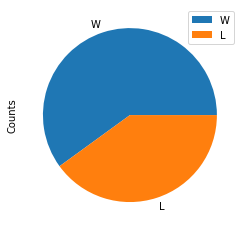

In [22]:
## Creating Visualizations Code Sample Done by Drake(with the help of Kushal And Drew)
##Importing packages required
import matplotlib
import matplotlib.pyplot as plt

mets = pd.read_csv('SyracuseMets.csv') ##Loading Data Set
result = mets['winloss'].value_counts()
result
mets_df = pd.DataFrame( {'winloss' : result.index, "Counts": result}) ##Creating dataframe
mets_df.plot.pie(y = 'Counts') ##Results(piechart)